### Required Assignment 3.3: Indexing

**Expected Time**: 60 Minutes

**Total Points**: 10

This activity works through a similar example to the video, again using the `gapminder` dataset.  The goal is to compute what fraction of the worlds GDP did each country generate each year. 

#### Index:

- [Problem 1](#Problem-1:-Total-GDP-by-year)
- [Problem 2](#Problem-2:-Resetting-the-Index)
- [Problem 3](#Problem-3:-Computing-Share-of-GDP)
- [Problem 4](#Problem-4:-Resetting-the-Index-Again)
- [Problem 5](#Problem-5:-Plotting-the-results)

In [21]:
#import necessary libraries
import plotly.express as px
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [22]:
gapminder = px.data.gapminder()

In [23]:
gapminder.head()

country continent  year  lifeExp       pop   gdpPercap iso_alpha  \
0  Afghanistan      Asia  1952   28.801   8425333  779.445314       AFG   
1  Afghanistan      Asia  1957   30.332   9240934  820.853030       AFG   
2  Afghanistan      Asia  1962   31.997  10267083  853.100710       AFG   
3  Afghanistan      Asia  1967   34.020  11537966  836.197138       AFG   
4  Afghanistan      Asia  1972   36.088  13079460  739.981106       AFG   

   iso_num  
0        4  
1        4  
2        4  
3        4  
4        4

In [24]:
gapminder.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1704 entries, 0 to 1703
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   country    1704 non-null   object 
 1   continent  1704 non-null   object 
 2   year       1704 non-null   int64  
 3   lifeExp    1704 non-null   float64
 4   pop        1704 non-null   int64  
 5   gdpPercap  1704 non-null   float64
 6   iso_alpha  1704 non-null   object 
 7   iso_num    1704 non-null   int64  
dtypes: float64(2), int64(3), object(3)
memory usage: 106.6+ KB


[Back to top](#Index:) 


### Problem 1: Total GDP per Capita by year

**2 Points**

Use the `groupby` operation on the `gapminder` DataFrame to group the `year` column. Next, use the `sum()` function to compute the total GDP per Capita (`gdpPercap`) for each year.  Assign your results as a DataFrame to `ans1` below.

In [25]:
### GRADED

ans1 = None

# YOUR CODE HERE
ans1 = gapminder.groupby("year")[["gdpPercap"]].sum()

# Answer check
print(ans1)
print(type(ans1))

         gdpPercap
year              
1952  5.289892e+05
1957  6.105160e+05
1962  6.710654e+05
1967  7.786787e+05
1972  9.613518e+05
1977  1.038470e+06
1982  1.067684e+06
1987  1.121931e+06
1992  1.158522e+06
1997  1.290805e+06
2002  1.408334e+06
2007  1.658570e+06
<class 'pandas.core.frame.DataFrame'>


[Back to top](#Index:) 


### Problem 2: Resetting the Index

**2 Points**


Use the `set_index()` function with argument equal to `['year', 'country']` on the `gapminder` DataFrame to compute the share of GDP. Assign the resulting DataFrame to `ans2` below.

In [26]:
### GRADED

ans2 = None

# YOUR CODE HERE
ans2 = gapminder.set_index(['year', 'country'])

# Answer check
print(ans2.head())
print(type(ans2))

                 continent  lifeExp       pop   gdpPercap iso_alpha  iso_num
year country                                                                
1952 Afghanistan      Asia   28.801   8425333  779.445314       AFG        4
1957 Afghanistan      Asia   30.332   9240934  820.853030       AFG        4
1962 Afghanistan      Asia   31.997  10267083  853.100710       AFG        4
1967 Afghanistan      Asia   34.020  11537966  836.197138       AFG        4
1972 Afghanistan      Asia   36.088  13079460  739.981106       AFG        4
<class 'pandas.core.frame.DataFrame'>


[Back to top](#Index:) 


### Problem 3: Computing Share of GDP

**2 Points**

Use your solutions from Problems 1 and 2 to determine each country's share of the world GDP by year. Assign the resulting DataFrame to `ans3` below. 

Hint: The resulting DataFrame `ans3` should have the following structure:

Columns:

- year: The year of the data.
- country: The name of the country.
- gdpPercap: The share of the world GDP for the corresponding country and year.

In [27]:
### GRADED

ans3 = None

# YOUR CODE HERE
ans3 = (ans2 / ans1).reset_index()[['year', 'country',  'gdpPercap']]

# Answer check
print(ans3.head())
print(ans3.shape, gapminder.shape)

   year      country  gdpPercap
0  1952  Afghanistan   0.001473
1  1957  Afghanistan   0.001345
2  1962  Afghanistan   0.001271
3  1967  Afghanistan   0.001074
4  1972  Afghanistan   0.000770
(1704, 3) (1704, 8)


[Back to top](#Index:) 


### Problem 4: Resetting the Index Again

**2 Points**

Using the gapminder DataFrame, set a multi-index with `year` and `country`, and then calculate each country's share of the total `gdpPercap` for each `year` (i.e., divide each country's `gdpPercap` by the sum of `gdpPercap` values for all countries in that year).
After calculating these shares, reset the index so that your final DataFrame, assigned to ans4, has columns [year, country, gdpPercap], where `gdpPercap` now represents the share for that country-year.

HINT:
- Use a multi-index on `year` and `country`.
- For each year, compute each country's share of the total gdpPercap (divide by the sum for that year).
- Reset the index and assign the resulting DataFrame to ans4 with columns `[year, country, gdpPercap]`.


In [29]:
### GRADED

ans4 = None

# YOUR CODE HERE
indexed = gapminder.set_index(['year', 'country'])
gapminder_indexed = indexed['gdpPercap']
gapminder_groupby = indexed.groupby('year')['gdpPercap'].sum()
share = gapminder_indexed / gapminder_groupby
ans4 = share.reset_index()
ans4.columns = ['year', 'country', 'gdpPercap']

# Answer check
print(ans4.head())
print(type(ans4))


   year      country  gdpPercap
0  1952  Afghanistan   0.001473
1  1957  Afghanistan   0.001345
2  1962  Afghanistan   0.001271
3  1967  Afghanistan   0.001074
4  1972  Afghanistan   0.000770
<class 'pandas.core.frame.DataFrame'>


[Back to top](#Index:) 


### Problem 5: Plotting the results

**2 Points**

You are given a DataFrame gapminder with columns: `year`, `country`, and `gdpPercap`.
You are also provided with a list of countries.

1. For each year, calculate each country's share of the total GDP per capita for that year.
2. Create a new DataFrame with columns: `year`, `country`, and the calculated GDP per capita share (name this column `gdpPercap`).
3. Filter this DataFrame to include only the rows where the country is in `list_of_countries`.
4. Store the final result in a variable called `ans5a`.



In [40]:
### GRADED

list_of_countries = ['China', 'United States', 'Japan', 'India', 'United Kingdom', 'Germany']

ans5a = None

# YOUR CODE HERE
gapminder_indexed = gapminder.set_index(['year', 'country'])
gdp_share = gapminder_indexed['gdpPercap'] / gapminder_indexed.groupby('year')['gdpPercap'].sum()

ans4 = gdp_share.reset_index()
ans4.columns = ['year', 'country', 'gdpPercap']
ans5a = ans4.query("country in @list_of_countries")

# Answer check
print(ans5a.head())
print(type(ans5a))


     year country  gdpPercap
288  1952   China   0.000757
289  1957   China   0.000943
290  1962   China   0.000727
291  1967   China   0.000787
292  1972   China   0.000704
<class 'pandas.core.frame.DataFrame'>


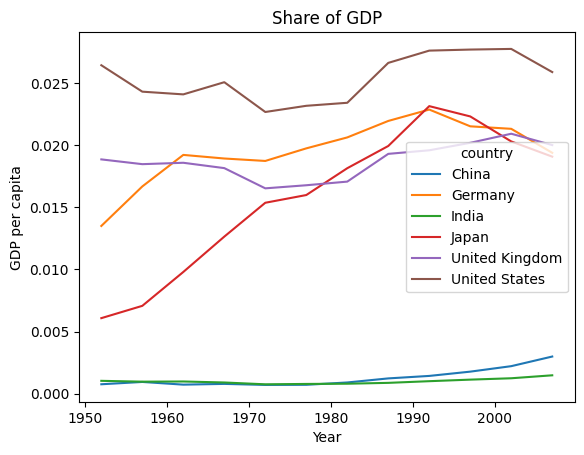

In [41]:
sns.lineplot(data = ans5a, x = 'year', y = 'gdpPercap', hue = 'country')
plt.title('Share of GDP')
plt.xlabel('Year')
plt.ylabel("GDP per capita");